# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import EC_Data

from ec4py import RHE,AREA,MASS
from ec4py import CV_Datas,EC_Data,CV_Data
from ec4py import AREA,LEGEND,RHE,NEG,POS,AVG

from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")
paths=list(path_to_dataSetFolder.glob("*.tdms"))
print(paths)
[print(x) for x in paths]



c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance
[WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123313_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123315_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123317_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123319_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123321_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123323_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123325_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/

[None, None, None, None, None, None, None, None, None, None]

## 3. Load in the data files

In [3]:
EC_Data(paths[0]).setup


{'Current Range': '10mA',
 'Control Mode': 'WE',
 'Cell Switch': 'TRUE',
 'Start': '0.500 V',
 'Start_Delay': '0.000 s',
 'V1': '1.500 V',
 'V2': '1.200 V',
 'Rate': '0.500 V/s',
 'Nr of Sweeps': '1.00',
 'Method.Duration': '1.2',
 'Method.Cycle Duration': '1.2',
 'Method.Avg.Time': '0.004',
 'AC Frequency': '5.000E+3 Hz',
 'AC Amplitude': '0.0150 V',
 'RHE': '-0.834 V',
 'Gas': 'None',
 'Temp_0': '298.15 K',
 'Temp_1': '298.15 K',
 'Pressure': '100000 Pa',
 'Cell Material': 'Acrylic',
 'CounterElectrode': 'GC',
 'Ref.Electrode': 'Ag/AgCl',
 'R.solution': '-1.00 Ohm',
 'IR.compensation': '-1.00 Ohm',
 'Electrolyte1': '1.0 M_NaOH: H2O_20 ml',
 'Electrode.Material': '',
 'Electrode.Tip': '',
 'Electrode.Area': '1.96E-5 m^2',
 'Electrode.ExElectrode': '',
 'Electrode.Cat.Loading': '0.00E+0 g m^-2',
 'Electrode.Cat.Weight': '0.00E+0 g',
 'Electrode.Cat.totWeight': '0.00E+0 g',
 'Electrode.Cat.w%': '0.00',
 'Electrode.Cat.Serial': '',
 'Electrode.Cat.Batch': '',
 'Electrode.Cat.Support': ''

In [4]:
EC_Data(paths[0])


EC_Data('CV_123313_ 1_MI.tdms')

In [5]:
CV_Data(paths[0],"i_0")

CV_Data('CV_123313_ 1_MI.tdms')

In [6]:
CV_Datas(paths,"i_2")

CV_Datas(['CV_123313_ 1_MI.tdms','CV_123315_ 1_MI.tdms','CV_123317_ 1_MI.tdms','CV_123319_ 1_MI.tdms','CV_123321_ 1_MI.tdms','CV_123323_ 1_MI.tdms','CV_123325_ 1_MI.tdms','CV_123328_ 1_MI.tdms','CV_123330_ 1_MI.tdms','CV_123333_ 1_MI.tdms'])

<Axes: xlabel='E (V)', ylabel='Current (A)'>

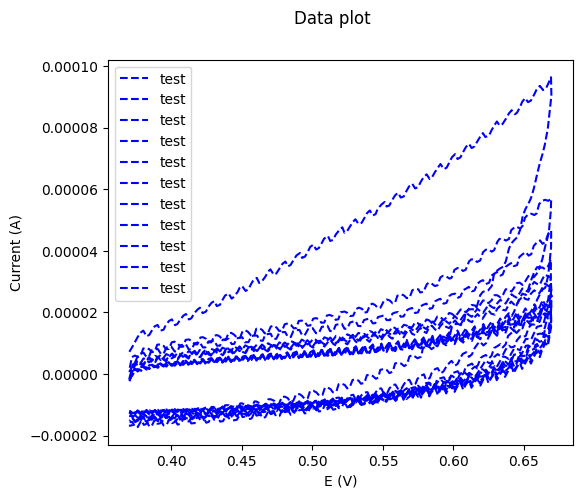

In [7]:
a =EC_Datas(paths)
a.plot("E","i_3",LEGEND.MWE_CH, color="blue", marker="o", linestyle="--", label="test")

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance\CV_123313_ 1_MI.tdms



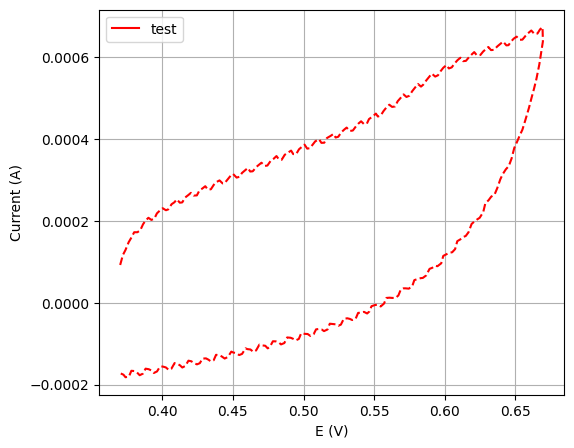

In [8]:
print(paths[0])
a = EC_Data(paths[0])
a.plot("E","i_5", color="red", marker=":", linestyle="--", label="test",grid=True)
print(a.setup_data._MWE_CH)

3


<Axes: xlabel='E vs RHE (V)', ylabel='i v$^{-1}$ (A V$^{-1}$ s)'>

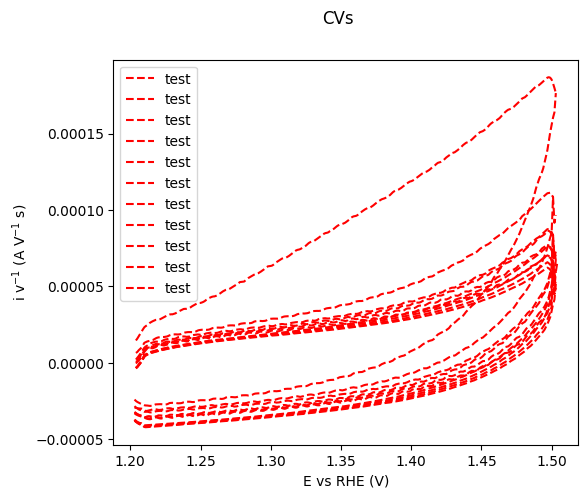

In [9]:
a=CV_Datas(paths,"i_3",y_smooth=5)
print(a[0].setup_data._MWE_CH)
#print(a.rate)
a.plot(RHE,RATE, LEGEND.MWE_CH, color="red", marker="o", linestyle="--", label="test")

(<matplotlib.lines.Line2D at 0x1fe8d952310>,
 <Axes: xlabel='E vs Ag/AgCl (V)', ylabel='i (A)'>)

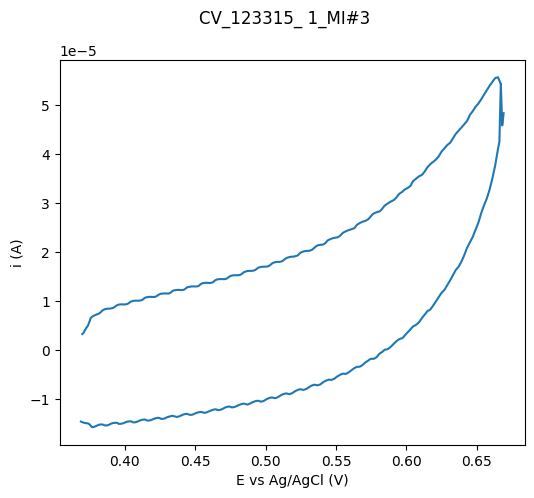

In [13]:
a[1].plot()

None
None


(<matplotlib.lines.Line2D at 0x1fe8d8f6dd0>,
 <Axes: xlabel='E vs Ag/AgCl (V)', ylabel='i$_{+}$ v$^{-1}$ (A V$^{-1}$ s)'>)

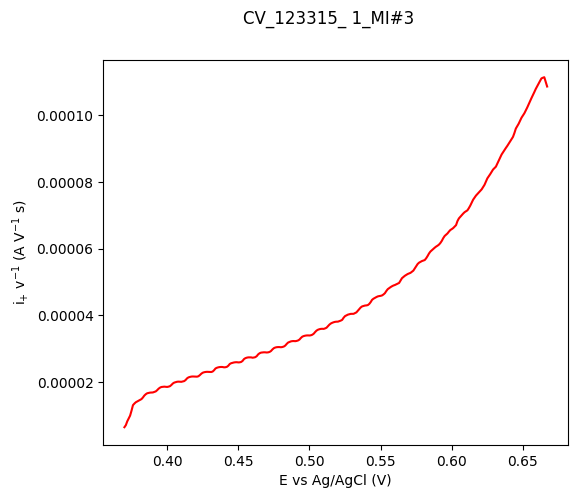

In [15]:
b=a[1].get_sweep(POS)
print(b.norm(RATE))
print(b.norm(POS))
b.plot(POS,color="red")

In [16]:
k,i=a.get_i_at_E(0.5,RHE)
print(i)

ValueError: too many values to unpack (expected 2)

In [ ]:
a[0].plot(RHE,NEG, RHE)
b=a[0].get_sweep(NEG)
b.plot(RHE)

In [ ]:
op={"dir":"all"}
op["dir"]
print(a[0]._direction("ALL","BAD","AAA",NEG))

In [ ]:
loc_args=("RHE",)
print(type(loc_args))

In [ ]:
print(type(None))

In [ ]:
loc_args = {str("RGE"),"df"}
print(type(loc_args))
loc_args = tuple(loc_args)
print(loc_args,len(loc_args))

In [ ]:
a.get_i_at_E(1.3,"",RHE,"aaaaaa")
a.RateAnalysis(1.3,RHE)

In [ ]:
a[1].plot(NO_PLOT)

In [ ]:
a.RateAnalysis(1.3,RHE,NO_PLOT)

In [ ]:
a.RateAnalysis(1.3,RHE,POS,NO_PLOT)



In [ ]:
b=a.get_sweep(POS)
b.get_i_at_E(1.3,RHE)
b.RateAnalysis(1.3,RHE,NEG)

In [ ]:
a.RanSev(1.35,RHE)

In [ ]:
b=a.get_sweep("dif")
b.plot(RATE,LEGEND.MWE_CH)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
size = [len(a[0].E),len(a.datas)+1]
print(size)
m = np.zeros(size)
m[:,0]=a[0].E
m[:,1]=a[0].get_sweep(POS).i

pd.DataFrame.from_records(m)



In [ ]:
a.get_sweep(POS).plot(RHE)

In [ ]:
y=a.get_sweep(POS)
y.set_active_RE(RHE)
y[0].E_label

In [ ]:
a.set_active_RE(RHE)
a[0].E_label
a.export_DataFrame(POS,RHE)